#Examen de la Unidad 2

##Por:
## * Gómez Núñez Eunice Yoshua
## * Vargas Rincón Alonso de Jesús

##Sección 2: Modelo de clasificación

In [1]:
# Importación de librerías necesarias

#from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt

In [2]:
#drive.mount('/content/gdrive') # Conexión con Google Drive

In [3]:
path = 'data.csv' # Definición de la ruta del archivo .csv
migraine = pd.read_csv(path) # Creación del dataframe. Su nombre queda como "migraine".

###Observaciones Previas 

In [4]:
migraine.head(10)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
5,49,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Migraine without aura
6,27,1,5,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,0,Basilar-type aura
7,24,1,1,1,1,2,1,0,1,1,...,1,0,0,0,0,0,0,0,1,Typical aura with migraine
8,50,1,5,1,1,2,1,1,1,1,...,1,0,0,0,0,0,0,0,1,Typical aura with migraine
9,23,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [5]:
migraine.tail(10)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
390,40,2,2,1,1,3,1,0,1,1,...,0,1,0,0,0,0,1,0,1,Basilar-type aura
391,34,1,1,1,1,3,1,0,1,1,...,1,0,1,0,1,0,1,0,0,Basilar-type aura
392,20,3,2,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,1,Basilar-type aura
393,36,3,1,1,1,3,1,0,1,1,...,1,0,0,1,1,0,0,0,1,Basilar-type aura
394,38,3,1,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura
399,37,1,1,1,1,3,1,1,1,1,...,1,0,0,0,0,0,1,0,1,Basilar-type aura


In [6]:
migraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

###Preparación de datos

La variable objetivo viene dada en cadena. Esto no es útil para el modelo, por lo cual se convertirán a valores numéricos de la siguiente manera:

In [7]:
migraine['Type'].unique() # Se buscan cuantos valores únicos hay

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [8]:
migraine['Type'].nunique() # Y se contabilizan

7

In [9]:
migraine['Type'].unique()[0] # Se obtiene valor por valor de acuerdo a su índice en el arreglo de valores únicos

'Typical aura with migraine'

In [10]:
migraine['Type'].unique()[1]

'Migraine without aura'

In [11]:
migraine['Type'].unique()[2]

'Basilar-type aura'

In [12]:
migraine['Type'].unique()[3]

'Sporadic hemiplegic migraine'

In [13]:
migraine['Type'].unique()[4]

'Familial hemiplegic migraine'

In [14]:
migraine['Type'].unique()[5]

'Other'

In [15]:
migraine['Type'].unique()[6]

'Typical aura without migraine'

In [16]:
# Cada cadena referente al tipo de migraña es sustituida por un valor numérico
# Este valor es equivalente al ínidice que tenía el tipo de migraña en el arreglo de valores únicos.
migraine.loc[migraine.Type == migraine['Type'].unique()[0], 'Type'] = 0
migraine.loc[migraine.Type == migraine['Type'].unique()[1], 'Type'] = 1
migraine.loc[migraine.Type == migraine['Type'].unique()[2], 'Type'] = 2
migraine.loc[migraine.Type == migraine['Type'].unique()[3], 'Type'] = 3
migraine.loc[migraine.Type == migraine['Type'].unique()[4], 'Type'] = 4
migraine.loc[migraine.Type == migraine['Type'].unique()[5], 'Type'] = 5
migraine.loc[migraine.Type == migraine['Type'].unique()[6], 'Type'] = 6

Al observar los primeros y último datos, se puede corroborar que las cadenas fueron sustituídas por valores numéricos

In [17]:
migraine.head(10) 

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5,49,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
6,27,1,5,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,0,2
7,24,1,1,1,1,2,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
8,50,1,5,1,1,2,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0
9,23,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
migraine.tail(10)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
390,40,2,2,1,1,3,1,0,1,1,...,0,1,0,0,0,0,1,0,1,2
391,34,1,1,1,1,3,1,0,1,1,...,1,0,1,0,1,0,1,0,0,2
392,20,3,2,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,1,2
393,36,3,1,1,1,3,1,0,1,1,...,1,0,0,1,1,0,0,0,1,2
394,38,3,1,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,2
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,2
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,2
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,2
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,2
399,37,1,1,1,1,3,1,1,1,1,...,1,0,0,0,0,0,1,0,1,2


###Obtención de los valores para X e y.

In [19]:
migraine.columns # Se revisa cuantas columnas hay

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [20]:
# Todas las columnas a excepción de la objetivo (Type) se toman para X
X = migraine[['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF']]
X

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
396,20,3,2,1,1,3,1,0,1,1,...,0,0,1,1,0,0,0,0,0,1
397,28,3,2,1,1,3,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
398,20,3,1,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,1,1


In [21]:
X.info() # Se corrobora que tenga las columnas correctas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          400 non-null    int64
 1   Duration     400 non-null    int64
 2   Frequency    400 non-null    int64
 3   Location     400 non-null    int64
 4   Character    400 non-null    int64
 5   Intensity    400 non-null    int64
 6   Nausea       400 non-null    int64
 7   Vomit        400 non-null    int64
 8   Phonophobia  400 non-null    int64
 9   Photophobia  400 non-null    int64
 10  Visual       400 non-null    int64
 11  Sensory      400 non-null    int64
 12  Dysphasia    400 non-null    int64
 13  Dysarthria   400 non-null    int64
 14  Vertigo      400 non-null    int64
 15  Tinnitus     400 non-null    int64
 16  Hypoacusis   400 non-null    int64
 17  Diplopia     400 non-null    int64
 18  Defect       400 non-null    int64
 19  Ataxia       400 non-null    int64
 20  Conscience

In [22]:
y = migraine[['Type']].astype('int') # "y" toma la característica objetivo
y

,Type
0,0
1,0
2,0
3,0
4,0
...,...
395,2
396,2
397,2
398,2


In [23]:
#Se obtienen los datos de entranamiento y prueba para X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###Uso del modelo y respuestas al examen

**Crea un modelo de clasificación base utilizando cualquier algoritmo de clasificación de tu
elección.**

In [24]:
# El modelo elegido es el Árbol de Decisión clasificador
dtc = DecisionTreeClassifier()

**Proporcione una breve descripción del algoritmo y sus suposiciones.**

El Árbol de Decisión Clasificador, como su nombre lo dice, se basa en la estructura de arbol para el análisis de información donde los datos obtenidos tienen un comportamiento tal que permitan ser clasificados. 

El nodo inicial o raíz de toma de una de las características de forma aleatoria y a partir de ahí, se empiezan a formar los nodos hijos revisando las demás características. El árbol va realizando divisiones hasta llegar a partes mas simples de los datos en donde la cantidad de muestras por nodo hoja sea pequeña y las impurezas de aleatoriedad sean también mínimas, pero, sin llegar a una situacción de sobreajuste del modelo.

Mi suposición en base al segundo párrafo es que el árbol tomará los datos, y 
en base a una característica seleccionada aleatoriamente, irá desglosando los datos y formando mas nodos para analizar los datos que se le den. En el caso del modelo base, existe un riesgo de que el modelo se sobreajuste o "memorice" los datos de tal manera que no sea útil para revisar datos ajenos al dataset.


**Realice una validación cruzada utilizando una validación cruzada de 5 veces e
informe la media y la desviación estándar de las puntuaciones de validación cruzada**

In [25]:
n_for = 5 # La validación cruzada de 5 veces se refiere a las iteraciones que ha de realizar. Por eso el valor de 5.
listaEvalsAD = list() # Se crea Lista para almacenar puntajes.
listaExactitudes = list() # Se crea Lista para almacenar valores de la métrica de exactitud.
listaPrecisiones = list() # Se crea Lista para almacenar métricas de exactitud.
listaRecuperaciones = list()  # Se crea Lista para almacenar métricas de recuperación.
listaF1s = list()  # Se crea Lista para almacenar métricas de F1.

# Ciclo para la validación cruzada. En cada iteración se realiza lo siguiente:
for k in range (n_for):
  dtc = DecisionTreeClassifier() # Creación de un modelo base del árbol de decisión clasificador.
  dtc.fit(X_train, y_train) # Entrenamiento del modelo con los datos de entrenamiento.
  tmp = dtc.score(X_test, y_test) # Obtención del puntaje con el uso de los datos de prueba.
  listaEvalsAD.append(tmp) # Almacenamiento del puntaje.

  y_pred = dtc.predict(X_test) # Predicción de datos a partir de los datos de prueba de X
  
  # Cálculo y almacenamiento de las métricas antes mencionadas.
  listaExactitudes.append( accuracy_score(y_test, y_pred) ) 
  listaRecuperaciones.append( recall_score(y_test, y_pred, average = 'micro') )
  listaPrecisiones.append ( precision_score(y_test, y_pred, average = 'micro') )
  listaF1s.append( f1_score(y_test, y_pred, average = 'micro')  )

# Promedio y desviación estándar son notificados por impresión en consola.
print('Árbol de Decisión con parámetros por default\n*Promedio y Desviación Estándar %1ff%% (%.1f)' % (100*np.mean(listaEvalsAD), 100*np.std(listaEvalsAD)))

Árbol de Decisión con parámetros por default
*Promedio y Desviación Estándar 80.333333f% (1.8)


**Explica por qué la validación cruzada es importante para evaluar el rendimiento de tu
modelo.**

Al no tener fijos los hiperparámetros, se da la posibilidad de que este y otros modelos sean muy variables en sus puntajes. Para comprobar esa variabilidad se podría bien realizar varias pruebas de forma manual, es decir, una y otra vez crear el modelo, entrenarlo, etc. Esto involucra más tiempo.

La validación cruzada ayuda por ejemplo en ese aspecto, nos ahorra tiempo en el análisis de varias ejecuciones del mismo modelo. 

Si no me equivoco (y aunque el concepto no lo tengo muy claro) la desviación estándar nos ayuda a conocer que tan cercano o lejano están cada uno de los valores de puntaje y con eso saber, que tan estable es el modelo ante distintas evaluaciones. 

Otro punto importante a revisar para comprobar la calidad del modelo, es revisar el conjunto de puntajes que arrojó y así ver si la dstribución es uniforme o si hay situaciones especiales donde los puntajes salen de un rango "normal".

**Ajusta los hiperparámetros de su modelo de clasificación mediante la búsqueda en
cuadrícula.**

In [26]:
#Configuración de la cuadrícula
grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'min_impurity_decrease': [0.10, 0.15, 0.20, 0.20, 0.25],
    'max_features' : ['sqrt', 'log2'],
    'random_state' : [0, 21, 42, 63]
}

dtc_cv = GridSearchCV(estimator = DecisionTreeClassifier() , param_grid = grid, cv = 5) # Búsqueda en malla de los mejore hiperparámetros
dtc_cv.fit(X_train, y_train) # Entrenamiento del modelo.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.1, 0.15, 0.2, 0.2, 0.25],
                         'random_state': [0, 21, 42, 63],
                         'splitter': ['best', 'random']})

**Explica los hiperparámetros que ajustó, el rango de valores que consideró y la razón detrás
de sus elecciones.**

* Criterion: De acuerdo con la documentación es para medir la calidad de la división. Los valores que consideré fueron 'gini', 'entropy' y 'log_loss'. Consideré este parámetro porque ayuda a que cada nodo tenga un nivel bajo de aleatoriedad en sus datos. Cuanto menor sea la aleatoriedad más preciso será el modelo. Con gini se va revisando el nivel de impureza de aleatoriedad (o de variedad de opciones) mientras que con entropía hay un incremento de valor entre más aleatoriedad hay. Consideré esos 3 valores porque, de acuerdo a la documentación son los que están disponibles para Criterion.

* Splitter: De acuerdo a la documentación es la estrategia utilizada para dividir los datos. Los valores considerados fueron 'best' y 'random' y al ser los únicos disponibles, los elegí.

* Min_Impurity_decrease: Este parámetro puede ir muy bien combinado con el Criterio 'Gini' ya que consiste en establecer el mínimo valor de impureza que debe tener un nodo para ya no dividirlo. Combina bien con Gini porque ayuda a ponerle como un "tope" de divisiones si se ajusta correctamente. El rango de valores considerados es desde 0.10 hasta 0.25 en saldos de 0.05 y la razón se debe a que en una de las páginas que investigué sobre los hiperparámetros de este modelo, se mostraba un ejemplo donde su valor era 0.2, por lo cual, quise brindar unos valores que rodearan esa cantidad. Lo que debe evitarse es dejarlo en su valor por defecto, es decir, 0, ya que esto puede provocar que el modelo haga n divisiones hasta disminuir por completo las impurezas y con ello, provocar un mal entrenamiento.

* Max_Features: De acuerdo a la documentación este hiperparámetro hace referencia a la cantidad de características que hay que revisar para lograr la mejor división. Como valores especifiqué sqrt y log2. Este hiperparámetro me puede servir ya que sería pesado si el modelo tuviera que revisar todas y cada una de las características para una división, resulta más ráido tomar solo algunas. En cuanto a los valores elegidos, estos se deben a que son como que la variedad existentes de valores. Hay otro 2 pero uno de ellos aplica lo mismo que sqrt y el otro trabaja con todas las características.

* Random_State:  Con Random State es posible hacer que el modelo arroje puntajes muy parecidos en varias ejecuciones si se le coloca un valor entero. La documentación informa que es recomendable probar con distintos valores para ver que tan estable es el comportamiento del modelo. Los valores considerados están entre 0 y el 53 en saltos de 21. La razón de la elección de estos valores es que, de acuerdo a la documentación, los valores más populares son 0 y 42 y lo que hice fue nuevamente jugar con los valores incrementando o decrementando de 21. Esto puede ayudar en la validación cruzada, ya que, si se ha de probar el mismo modelo n veces, conviene que se haga con diferetens valores Random_State para ver que tan estable se mantiene.

**Informe los mejores hiperparámetros que encontró y la puntuación de validación cruzada
correspondiente.**

Estos fueron los mejores hiperparámetros

In [27]:
dtc_cv.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.1,
 'random_state': 0,
 'splitter': 'best'}

In [28]:
# Se crea un modelo con los mejores hiperparámetros
new_dtc = DecisionTreeClassifier(criterion = 'entropy',
                                 max_features= 'sqrt',
                                 min_impurity_decrease= 0.1,
                                 random_state= 0,
                                 splitter= 'best')

In [29]:
# Se entrena el modelo
new_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_impurity_decrease=0.1, random_state=0)

Este es el score de validación cruzada:

In [30]:
new_dtc.score(X_test, y_test)

0.7583333333333333

**Evalúa el rendimiento de tu modelo de clasificación ajustado utilizando precisión,
recuperación y puntaje F1.**

In [31]:
y_pred = new_dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7583333333333333

In [32]:
recall_score(y_test, y_pred, average = 'micro')

0.7583333333333333

In [33]:
precision_score(y_test, y_pred, average = 'micro')

0.7583333333333333

In [34]:
f1_score(y_test, y_pred, average = 'micro') 
# El mismo error ocurrió en esta instrucción

0.7583333333333333

**Explique el significado de estas métricas y cómo se pueden usar para evaluar el rendimiento de un modelo de clasificación.**

* Accuracy_Score se refiere a una métrica de exactitud y calcula el cociente de la división: cantidad de predicciones correctas entre cantidad de predicciones totales.

* Recall_Score hace referencia al cociente de la siguiente división: cantidad de verdaderos positivos en la predicción entre positivos reales (es decir verdaderos positivos + falsos negativos). Tomano en cuentra el parámetro average = 'micro' se tendrá que sumará todos los verdaderos-positivos de todas las clases y las dividirá entre todos los verdaderos reales.

* Precision_score es una métrica de precisión. En algunos lugares en internet su nombre puede intercambiarse o asignarsele a accuracy. Su formula consiste en dividir la cantidad de predicciones verdaderas positivas entre la suma de las predicciones verdaderas positivas y falsas positivas.

* F1_score: Es una métrica que combina precisión (precision) y recuperación (recall). Su fórmula consiste en una división, donde el dividendo es igual a la multiplicación entre la medida de precision y recall y el divisor es igual a la suma entre estos dos valores también. El resultado obtenido se multiplica por 2.

La medida de la exactitud puede utilizarse cuando se quiere saber que tan eficiente es el modelo de una forma general, es decir, no tomando enfoque en predicciones positivas, negativas, verdaderas o falsas, sino más bien incluyendo todas y sacando un porcentaje total.

La medida de recuperación será útil para saber que tan eficiente es el modelo para detectar los casos positivos en el conjunto de los datos positivos reales.

Por su parte, la medida de precision nos ayudará a saber qel grado de equivocación del modelo al catalogar un dato como positivo. 

Recuperación y precisión podría confundirse pero puedo expresar que la diferencia es que el primero calcula que tanto exito tendrá el modelo en encontrar todos los datos positivos. Aplicándolo a este modelo, se puede entender que recuperación nos ayudará determinar que tan bueno será el árbol de decisión para ubicar a los pacientes con Aura típica con migraña dentro del conjunto de pacientes que realmente la padecen, es decir, responderá a la pregunta ¿A cuántos pacientes con este padecimiento logrará encontrar?. Por su parte la precisión se puede ver reflejada en que tan confiable será el modelo a la hora de dar el diagnóstico de Aura típica con migraña, es decir, la pregunta que respondería en este caso sería ¿De todos los diagnósticos dados, cuántos son verdaderos?

Por último F1_score al combinar dos métricas ayudará a determinar que tan libre está un modelo de los dos tipos de errores presentes en las métricas combinadas, los cuales son: error por predicciones falsas negativas (métrica de recuperación) y error por predicciones positivas falsas (métrica de precisión)

**Compare el rendimiento de tu modelo de clasificación ajustado con el modelo base y
explique cualquier diferencia que haya observado.**

In [35]:
# Se realiza una validación cruzada de 5 veces para el modelo de árbol de decisión con los mejores hiperparámetros encontrados

listaEvalsAD_HP = list() # Se crea lista para almacenar los puntajes resultantes de la validación cruzada.

# Se crean listas para almacenar valores de las sigientes métricas: exactitud(accuracy), precisión(precision), recuperaciones(recall), y f1
listaExactitudes_HP = list()
listaPrecisiones_HP = list()
listaRecuperaciones_HP = list()
listaF1s_HP = list()

# Ciclo para la validación cruzada. En cada iteración se realiza lo siguiente:
for k in range(n_for):

  # Se crea modelo con los mejores hiperparámetros encontrados
  dtc_hp = DecisionTreeClassifier(criterion = 'entropy',
                                  max_features= 'sqrt',
                                  min_impurity_decrease= 0.1,
                                  random_state= 0,
                                  splitter= 'best')
  dtc_hp.fit(X_train, y_train) # Se entrena el modelo con los datos de entrenamiento.
  
  tmp = dtc_hp.score(X_test, y_test) # Se calcula y se almacena en una variable el puntaje.
  listaEvalsAD_HP.append(tmp) # Se agrega el puntaje a una lista de puntajes.

  # Se realiza una predicción en base a los datos prueba de X.
  y_pred = dtc_hp.predict(X_test)
  
  # Se calculan y se almacenan valores de las métricas antes menciondas.
  listaExactitudes_HP.append( accuracy_score(y_test, y_pred) )
  listaRecuperaciones_HP.append( recall_score(y_test, y_pred, average = 'micro') )
  listaPrecisiones_HP.append ( precision_score(y_test, y_pred, average = 'micro') )
  listaF1s_HP.append( f1_score(y_test, y_pred, average = 'micro')  )
  
# Se notifica la precisión de prueba y de entrenamiento de del modelo con los hiperparametros ajustados.
print('Árbol de decisión\nExactitud(Accuracy) con parámetros ajustados:\nTrain:\t%.2f%%\nTest:\t%.2f%%'
%(100*dtc_hp.score(X_train, y_train), 100*dtc_hp.score(X_test, y_test)))

Árbol de decisión
Exactitud(Accuracy) con parámetros ajustados:
Train:	80.71%
Test:	75.83%


In [36]:
ddff = pd.DataFrame(list(zip(listaEvalsAD, listaEvalsAD_HP)), columns = ["default", "ajustado"])
ddff

,default,ajustado
0,0.775000,0.758333
1,0.791667,0.758333
2,0.808333,0.758333
3,0.825000,0.758333
4,0.816667,0.758333


<function matplotlib.pyplot.show(close=None, block=None)>

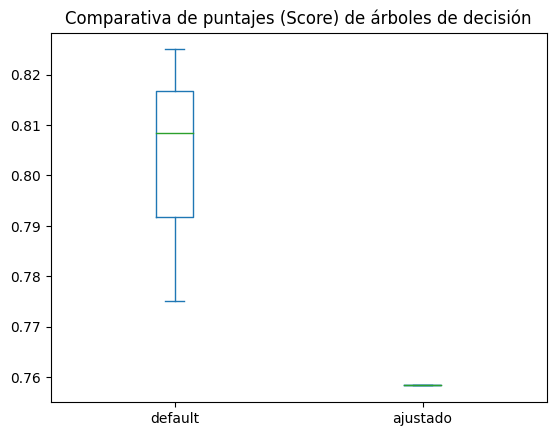

In [37]:
ddff.plot(kind='box')
plt.title('Comparativa de puntajes (Score) de árboles de decisión')
plt.show

Diferencias en la comparativa de modelos

Noto principalmente dos cosas en esta comparativa:
1. El rango de valores de los resultados arrojados por el modelo con los hiperparámetros ajustados no es diverso a diferencia del modelo base, el cual obtuvo distintos valores. Esto bien puede deberse a que el modelo con hiperparámetros tiene un valor entero para el "random_state" lo que puede ocasionar mismos resultados para distintas ejecuciones.

2. El promedio de puntaje (score) del modelo base es mayor al modelo con hiperparámetros ajustados.Esto podría deberse a un posible conflicto entre los hiperparámetros elegidos.

In [38]:
ddff_accuracy = pd.DataFrame(list(zip(listaExactitudes, listaExactitudes_HP)), columns = ["default", "ajustado"])
ddff_accuracy

,default,ajustado
0,0.775000,0.758333
1,0.791667,0.758333
2,0.808333,0.758333
3,0.825000,0.758333
4,0.816667,0.758333


<function matplotlib.pyplot.show(close=None, block=None)>

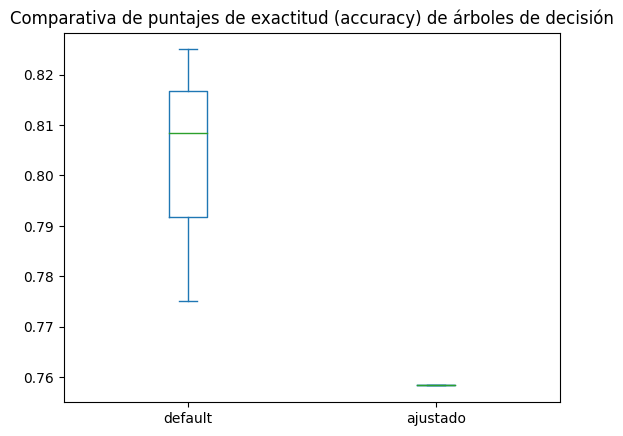

In [39]:
ddff_accuracy.plot(kind='box')
plt.title('Comparativa de puntajes de exactitud (accuracy) de árboles de decisión')
plt.show

In [40]:
ddff_recall = pd.DataFrame(list(zip(listaRecuperaciones, listaRecuperaciones_HP)), columns = ["default", "ajustado"])
ddff_recall

,default,ajustado
0,0.775000,0.758333
1,0.791667,0.758333
2,0.808333,0.758333
3,0.825000,0.758333
4,0.816667,0.758333


<function matplotlib.pyplot.show(close=None, block=None)>

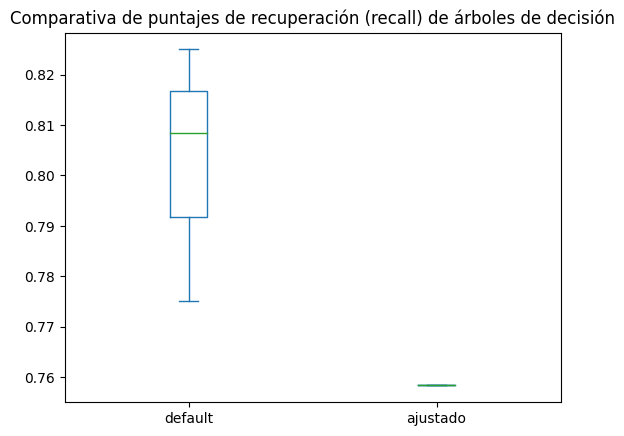

In [41]:
ddff_recall.plot(kind='box')
plt.title('Comparativa de puntajes de recuperación (recall) de árboles de decisión')
plt.show

In [42]:
ddff_precision = pd.DataFrame(list(zip(listaPrecisiones, listaPrecisiones_HP)), columns = ["default", "ajustado"])
ddff_precision

,default,ajustado
0,0.775000,0.758333
1,0.791667,0.758333
2,0.808333,0.758333
3,0.825000,0.758333
4,0.816667,0.758333


<function matplotlib.pyplot.show(close=None, block=None)>

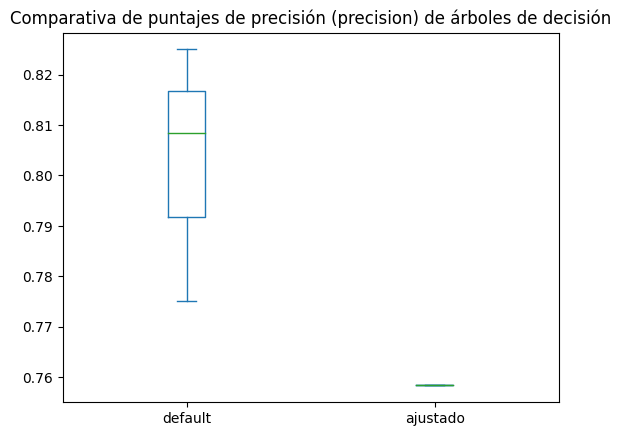

In [43]:
ddff_precision.plot(kind='box')
plt.title('Comparativa de puntajes de precisión (precision) de árboles de decisión')
plt.show

In [44]:
ddff_F1 = pd.DataFrame(list(zip(listaF1s, listaF1s_HP)), columns = ["default", "ajustado"])
ddff_F1

,default,ajustado
0,0.775000,0.758333
1,0.791667,0.758333
2,0.808333,0.758333
3,0.825000,0.758333
4,0.816667,0.758333


<function matplotlib.pyplot.show(close=None, block=None)>

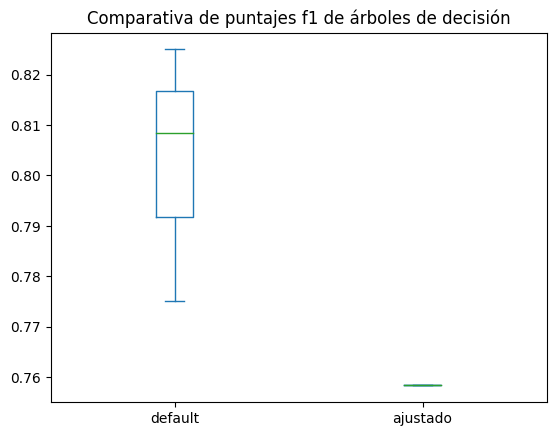

In [45]:
ddff_F1.plot(kind='box')
plt.title('Comparativa de puntajes f1 de árboles de decisión')
plt.show

En cuanto a las métricas de: exactitud, recuperación, precisión y f1 se observa el mismo comportamiento: menos diversidad y puntaje por parte del modelo con hiperparámetros ajustados.